In [108]:
import requests
import pandas as pd
import seaborn as sns



In [109]:

r = requests.get("https://raw.githubusercontent.com/pesikj/progr2-python/master/data/crypto_prices.csv")
open("crypto_prices.csv", "wb").write(r.content)

5312466

In [110]:
data = pd.read_csv("crypto_prices.csv")
data = data[["Symbol", "Date", "Close"]]
data.sort_values(by=["Symbol","Date"],inplace=True)
data

,Symbol,Date,Close
0,AAVE,2020-10-05 23:59:59,53.219243
1,AAVE,2020-10-06 23:59:59,42.401599
2,AAVE,2020-10-07 23:59:59,40.083976
3,AAVE,2020-10-08 23:59:59,43.764463
4,AAVE,2020-10-09 23:59:59,46.817744
...,...,...,...
37077,XRP,2021-07-02 23:59:59,0.656763
37078,XRP,2021-07-03 23:59:59,0.672888
37079,XRP,2021-07-04 23:59:59,0.694945
37080,XRP,2021-07-05 23:59:59,0.654300


In [111]:
data["zmena"] = data.groupby("Symbol")["Close"].pct_change()
data


,Symbol,Date,Close,zmena
0,AAVE,2020-10-05 23:59:59,53.219243,NaN
1,AAVE,2020-10-06 23:59:59,42.401599,-0.203266
2,AAVE,2020-10-07 23:59:59,40.083976,-0.054659
3,AAVE,2020-10-08 23:59:59,43.764463,0.091819
4,AAVE,2020-10-09 23:59:59,46.817744,0.069766
...,...,...,...,...
37077,XRP,2021-07-02 23:59:59,0.656763,-0.006681
37078,XRP,2021-07-03 23:59:59,0.672888,0.024553
37079,XRP,2021-07-04 23:59:59,0.694945,0.032780
37080,XRP,2021-07-05 23:59:59,0.654300,-0.058487


In [112]:
#převedení na pivot, abych dostala data ve správném uskupení
pivot_krypto = pd.pivot_table(data, index="Date", columns="Symbol", values="zmena", aggfunc="mean")
pivot_krypto



Symbol,AAVE,ADA,ATOM,BNB,BTC,CRO,DOGE,DOT,EOS,ETH,...,SOL,TRX,UNI,USDC,USDT,WBTC,XEM,XLM,XMR,XRP
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-30 23:59:59,NaN,NaN,NaN,NaN,-0.038328,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 23:59:59,NaN,NaN,NaN,NaN,-0.158345,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 23:59:59,NaN,NaN,NaN,NaN,-0.100692,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03 23:59:59,NaN,NaN,NaN,NaN,-0.070906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-04 23:59:59,NaN,NaN,NaN,NaN,0.150895,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,0.010025,0.044014,0.058912,-0.002759,0.009679,0.016064,0.002921,0.004045,-0.000990,0.017238,...,0.018454,0.024932,0.020779,-0.000157,-0.000194,0.009106,0.024803,-0.023423,0.023147,-0.006681
2021-07-03 23:59:59,0.109882,0.008921,0.004505,0.037624,0.022760,0.039442,0.004677,0.013881,0.028492,0.035383,...,0.013472,0.004519,0.070335,-0.000051,-0.000076,0.025210,0.025111,0.003405,0.016124,0.024553
2021-07-04 23:59:59,0.066949,0.036499,0.037707,0.031837,0.017861,0.033957,0.000292,0.029595,0.003338,0.042949,...,-0.004879,0.007269,0.063874,-0.000484,-0.000455,0.017671,0.021231,0.014391,0.023695,0.032780


In [113]:
pivot_krypto.corr()



Symbol,AAVE,ADA,ATOM,BNB,BTC,CRO,DOGE,DOT,EOS,ETH,...,SOL,TRX,UNI,USDC,USDT,WBTC,XEM,XLM,XMR,XRP
Symbol,,,,,,,,,,,,,,,,,,,,,
AAVE,1.000000,0.470722,0.562494,0.399696,0.431446,0.343820,0.127263,0.554545,0.427624,0.651894,...,0.515869,0.449058,0.691837,-0.006949,0.078976,0.431375,0.416172,0.330575,0.425136,0.400106
ADA,0.470722,1.000000,0.562723,0.422165,0.502847,0.340270,0.274591,0.547938,0.504866,0.569384,...,0.362122,0.457651,0.501810,-0.082321,-0.043924,0.596042,0.467531,0.603466,0.540161,0.545768
ATOM,0.562494,0.562723,1.000000,0.499179,0.513050,0.391860,0.209949,0.594291,0.569255,0.589258,...,0.401478,0.506927,0.499218,-0.050558,-0.020253,0.468501,0.507507,0.513043,0.548324,0.436337
BNB,0.399696,0.422165,0.499179,1.000000,0.540271,0.334792,0.198944,0.466563,0.445958,0.515003,...,0.423526,0.375593,0.370999,-0.076940,-0.044112,0.557039,0.342316,0.350552,0.452686,0.345774
BTC,0.431446,0.502847,0.513050,0.540271,1.000000,0.409889,0.369433,0.552648,0.594179,0.515585,...,0.317901,0.475390,0.448729,-0.088752,-0.026281,0.930797,0.378874,0.374586,0.491680,0.360707
CRO,0.343820,0.340270,0.391860,0.334792,0.409889,1.000000,0.119545,0.454812,0.352358,0.365251,...,0.339714,0.322465,0.370527,-0.047451,-0.054682,0.353116,0.354995,0.335526,0.335806,0.298461
DOGE,0.127263,0.274591,0.209949,0.198944,0.369433,0.119545,1.000000,0.165520,0.289221,0.241974,...,0.090548,0.223658,0.058113,-0.016725,-0.007648,0.248418,0.206659,0.296985,0.217400,0.251765
DOT,0.554545,0.547938,0.594291,0.466563,0.552648,0.454812,0.165520,1.000000,0.507172,0.626813,...,0.392337,0.517055,0.592486,-0.062713,-0.012027,0.567843,0.471581,0.406538,0.476759,0.374119
EOS,0.427624,0.504866,0.569255,0.445958,0.594179,0.352358,0.289221,0.507172,1.000000,0.678572,...,0.305488,0.513045,0.425042,-0.045737,-0.111437,0.628566,0.474167,0.532179,0.567117,0.549968


C:\Users\Hanka\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


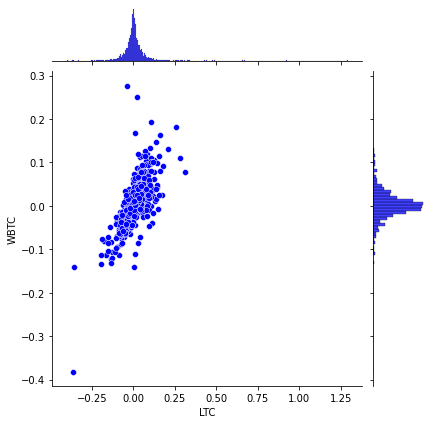

In [115]:
# scatter pro LTC A WBTC (cor. 0,71)
sns.jointplot("LTC", "WBTC", pivot_krypto, kind='scatter', color='blue')


C:\Users\Hanka\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


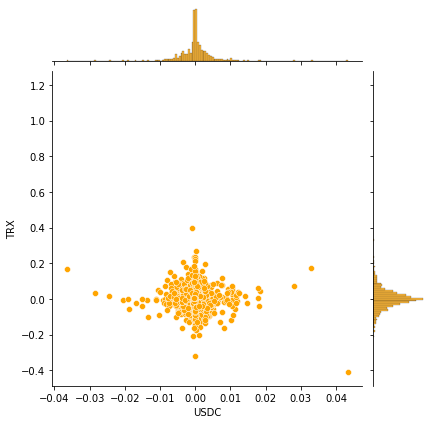

In [117]:
# scatter pro USDC a TRX (cor. 0.07)
sns.jointplot("USDC", "TRX", pivot_krypto, kind='scatter', color='orange')